## Heart Failure Analysis

Kaggle dataset challenge [HERE](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
for dirpath, dirnames, filenames in os.walk("./"):
    print(filenames)

['heart-failure.ipynb', 'heart_failure_clinical_records_dataset.csv']
['heart-failure-checkpoint.ipynb']


In [3]:
heart_failure_raw = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
heart_failure_raw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


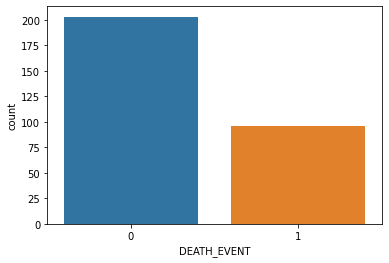

In [4]:
sns.countplot(
    heart_failure_raw["DEATH_EVENT"]
)

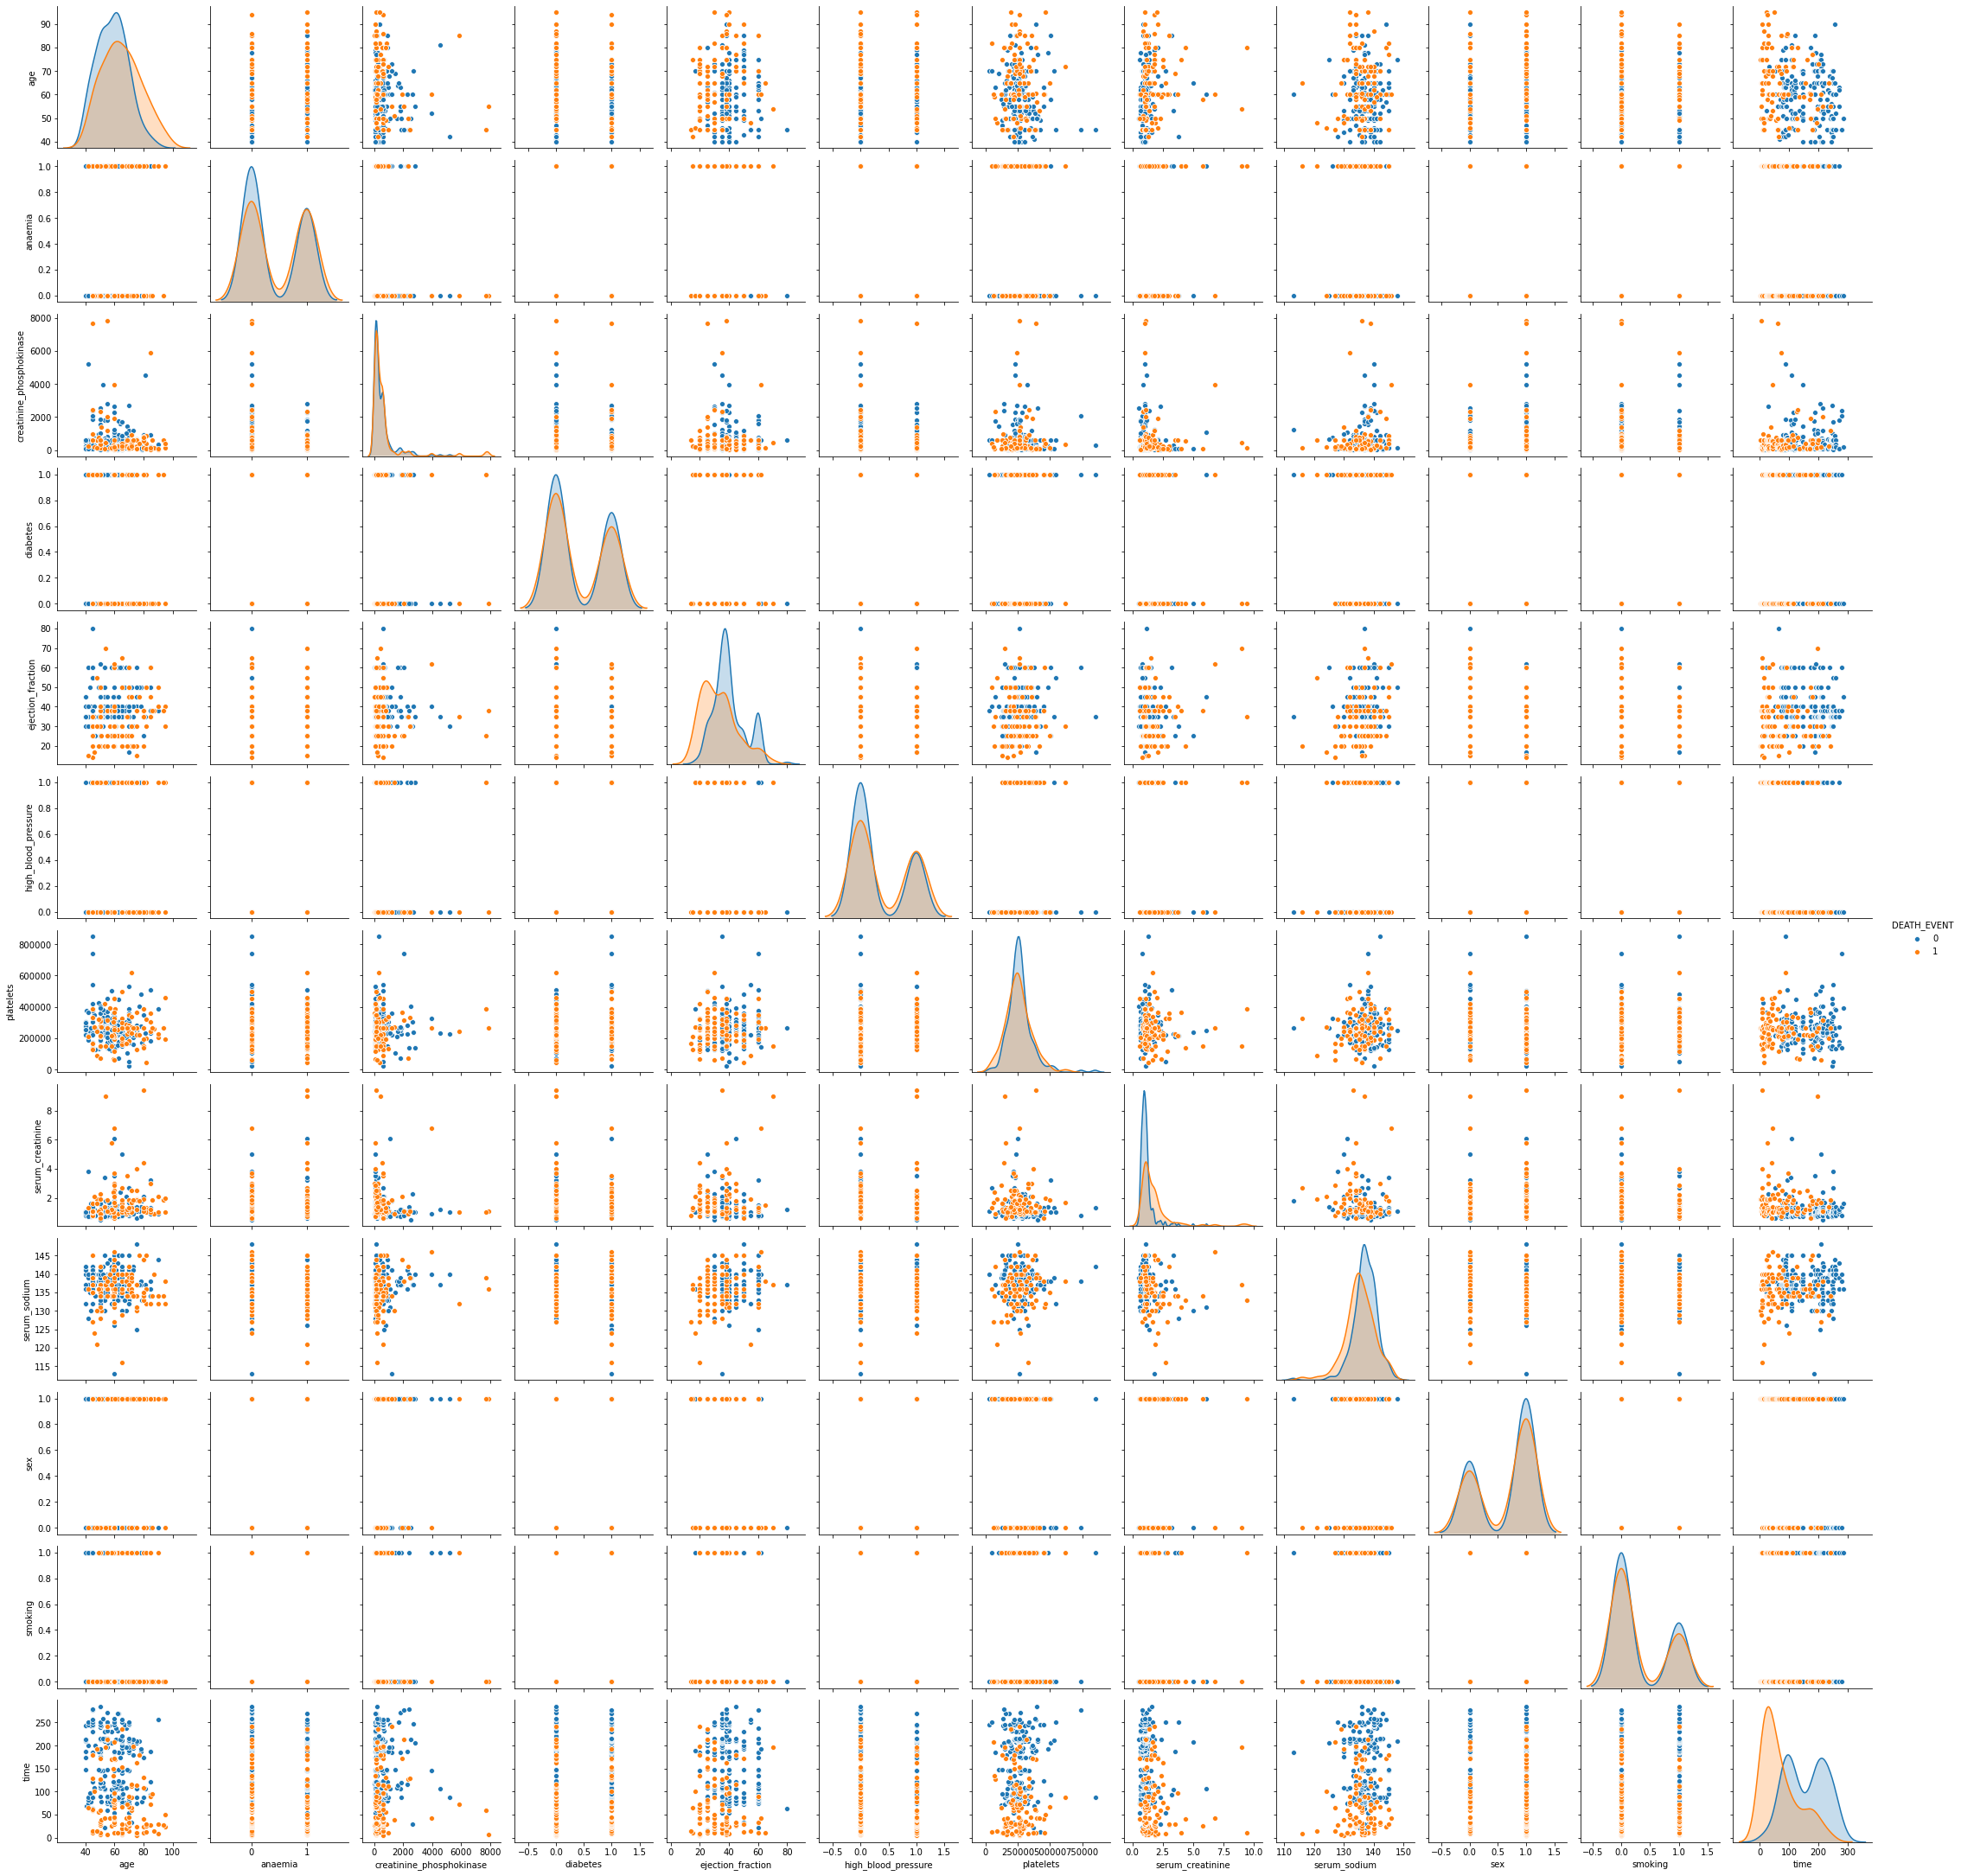

In [5]:
sns.pairplot(
    heart_failure_raw,
    hue="DEATH_EVENT"
)

In [6]:
heart_failure_raw.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


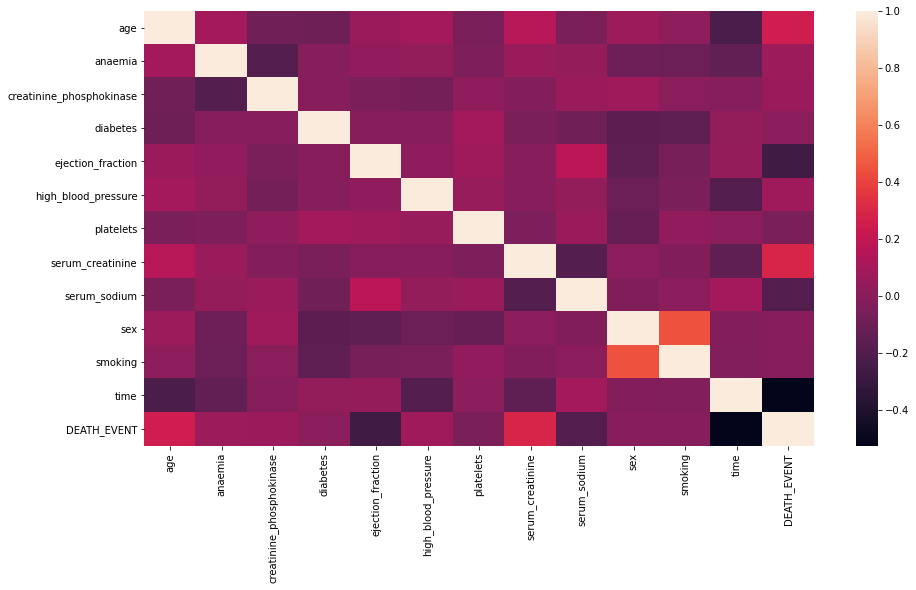

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    heart_failure_raw.corr()
)

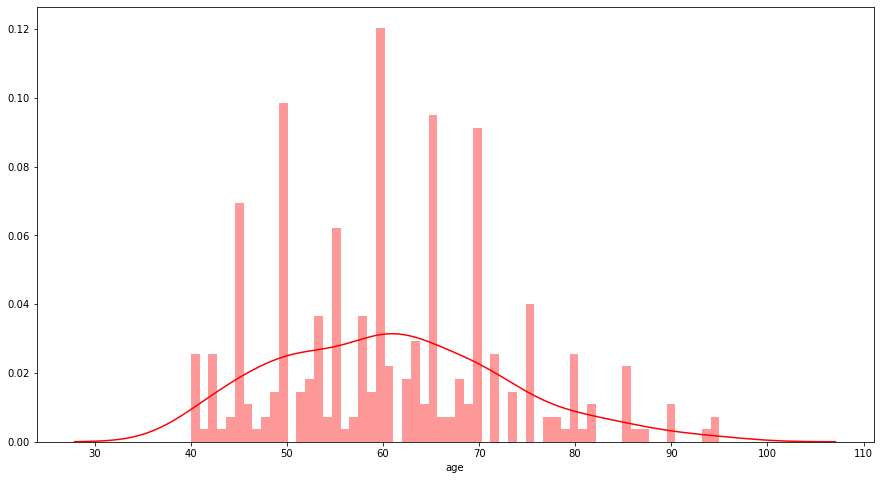

In [8]:
plt.figure(figsize=(15, 8))
sns.distplot(
    heart_failure_raw["age"],
    color="r",
    bins=60,
)

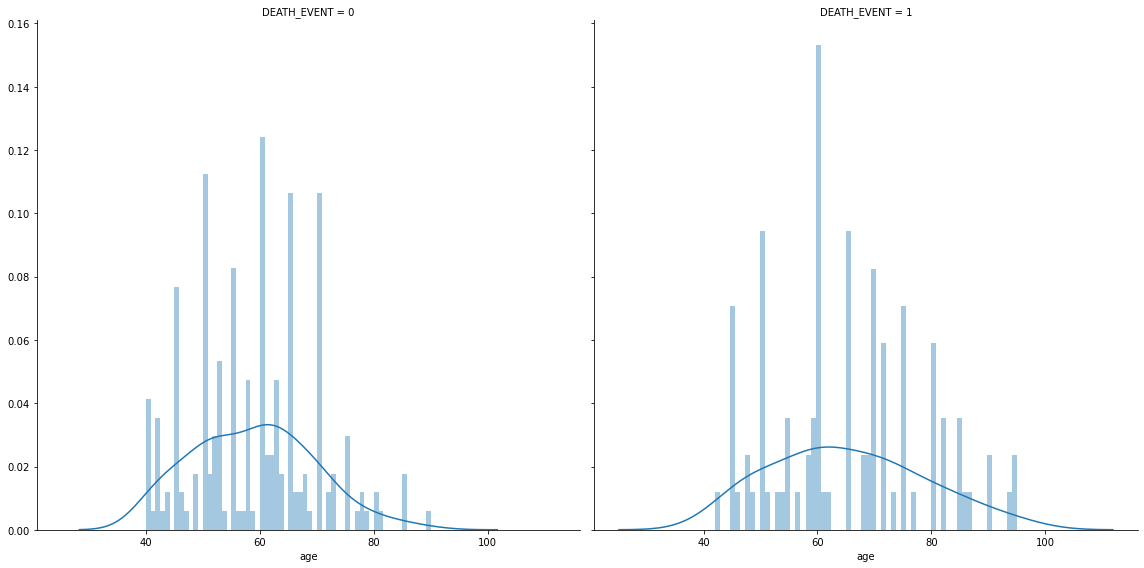

In [9]:
g = sns.FacetGrid(heart_failure_raw, col="DEATH_EVENT", height=8, aspect=1)
g.map(sns.distplot, "age", bins=60)

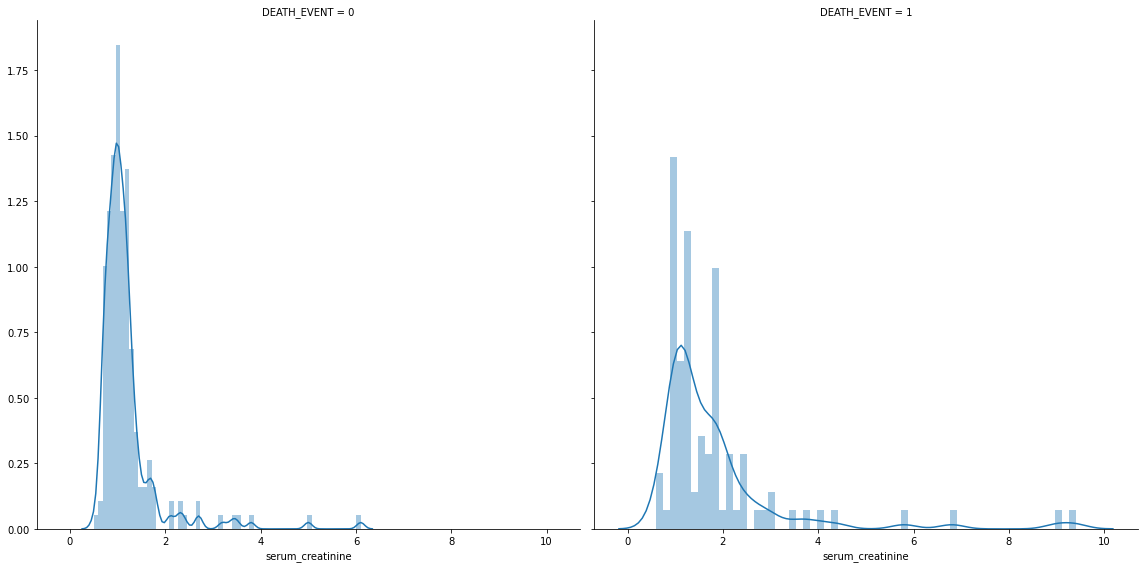

In [10]:
g = sns.FacetGrid(heart_failure_raw, col="DEATH_EVENT", height=8, aspect=1)
g.map(sns.distplot, "serum_creatinine", bins=60)

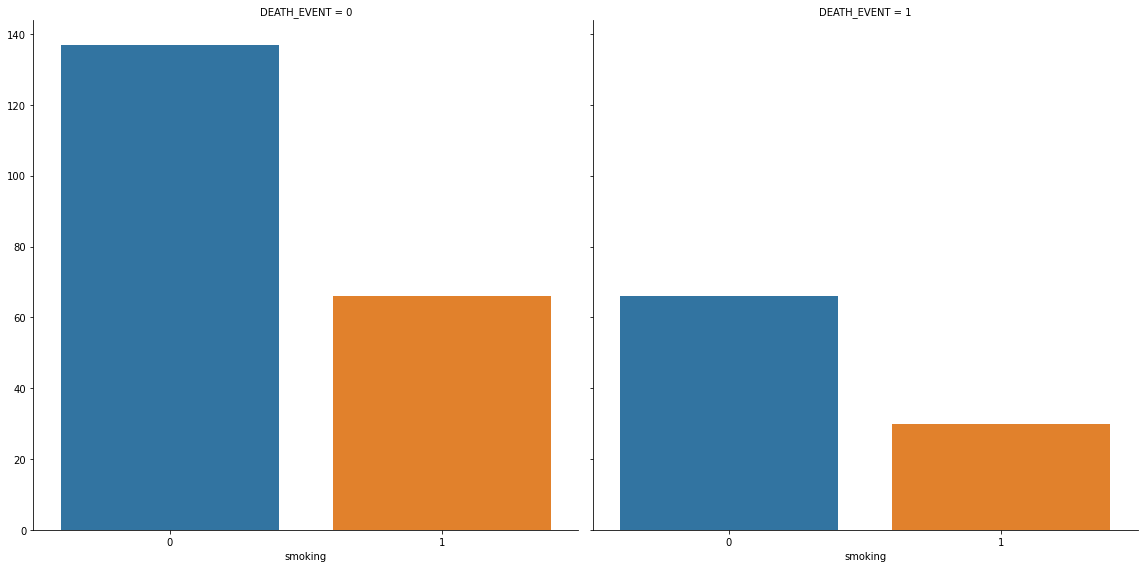

In [11]:
g = sns.FacetGrid(heart_failure_raw, col="DEATH_EVENT", height=8, aspect=1, hue="smoking")
g.map(sns.countplot, "smoking", order=(0,1))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
heart_failure_raw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


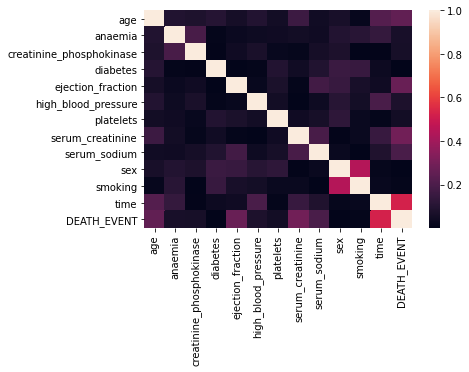

In [14]:
sns.heatmap(abs(heart_failure_raw.corr()))

In [60]:
X = ["ejection_fraction", "serum_creatinine", "time"]
y = "DEATH_EVENT"

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    heart_failure_raw[X], heart_failure_raw[y], test_size=0.2, random_state=1
)

In [97]:
X_train

,ejection_fraction,serum_creatinine,time
161,35,0.8,121
260,40,1.0,233
218,35,1.1,197
123,30,0.9,95
39,38,3.0,30
...,...,...,...
203,25,3.5,187
255,30,1.0,216
72,35,1.0,72
235,50,1.1,209


In [98]:
y_train

161    0
260    0
218    0
123    0
39     1
      ..
203    0
255    0
72     1
235    0
37     1
Name: DEATH_EVENT, Length: 239, dtype: int64

In [107]:
results = {}

for i in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(
        heart_failure_raw[X], heart_failure_raw[y], test_size=0.2, random_state=i
    )
    
    rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
    rf_predictions = rfc.predict(X_test)
    
    results[i] = accuracy_score(y_test, rf_predictions)

In [110]:
avg(results.values())

NameError: name 'avg' is not defined

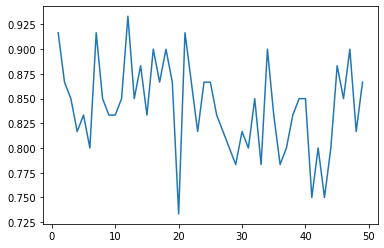

In [109]:
sns.lineplot(
    x=list(results.keys()),
    y=list(results.values())
)

In [41]:
rf_success = classification_report(y_test, rf_predictions)
print(rf_success)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.81      0.57      0.67        37

    accuracy                           0.77        90
   macro avg       0.78      0.74      0.74        90
weighted avg       0.77      0.77      0.76        90



In [42]:
accuracy_scores = {}

for i in range(10, 200):
    rfc = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    rf_predictions = rfc.predict(X_test)
    accuracy_scores[i] = accuracy_score(y_test, rf_predictions)

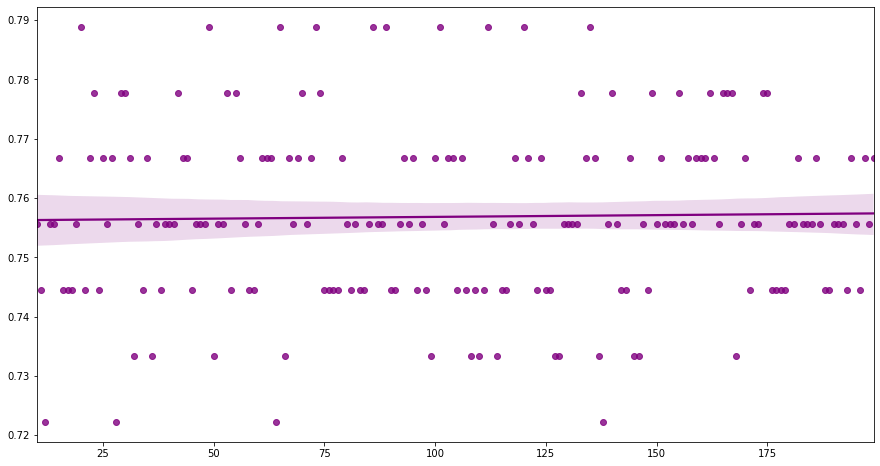

In [43]:
plt.figure(figsize=(15, 8))
sns.regplot(
    x=list(accuracy_scores.keys()),
    y=list(accuracy_scores.values()),
    color="purple"
)

In [26]:
rfc = RandomForestClassifier(n_estimators=120, criterion="entropy").fit(X_train, y_train)
rf_predictions = rfc.predict(X_test)
print(accuracy_score(y_test, rf_predictions))

0.8


### Model improvements

In [ ]:
heart_failure_raw.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    heart_failure_raw[X], heart_failure_raw[y], test_size=0.33, random_state=42
)

In [ ]:
X_train

In [ ]:
random_forest_classifier = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
logistic_classifier = LogisticRegression().fit(X_train, y_train)

In [ ]:
random_forest_predictions = random_forest_classifier.predict(X_test)

In [ ]:
logistic_predictions = logistic_classifier.predict(X_test)

In [ ]:
logistic_predictions[:10]

In [ ]:
accuracy_score(y_test, logistic_predictions)